In this project we will basically predict the profit for a resturant according to the population of area where it is located

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

## 3 - Dataset

You will start by loading the dataset for this task. 
- The `load_data()` function shown below loads the data into variables `x_train` and `y_train`
  - `x_train` is the population of a city
  - `y_train` is the profit of a restaurant in that city. A negative value for profit indicates a loss.   
  - Both `X_train` and `y_train` are numpy arrays.

In [2]:
# load the dataset
x_train, y_train = load_data()

In [3]:
# print x_train
print("Type of x_train:",type(x_train))
print("First five elements (rows) of x_train are:\n", x_train[:5]) 

Type of x_train: <class 'numpy.ndarray'>
First five elements (rows) of x_train are:
 [6.1101 5.5277 8.5186 7.0032 5.8598]


In [4]:
# print y_train
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])  

Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [17.592   9.1302 13.662  11.854   6.8233]


In [5]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (97,)
The shape of y_train is:  (97,)
Number of training examples (m): 97


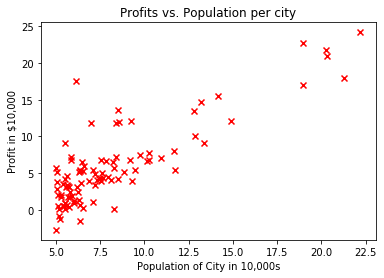

In [6]:
# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parameters
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')
plt.show()

#### Cost function


$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 


#### Model prediction

- For linear regression with one variable, the prediction of the model $f_{w,b}$ for an example $x^{(i)}$ is representented as:

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

This is the equation for a line, with an intercept $b$ and a slope $w$

In [9]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities) 
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    # You need to return this variable correctly
    total_cost = 0
    cost = 0
    ### START CODE HERE ###  
    for i in range(m):
        f_w = w * x[i] + b
        cost += (f_w - y[i]) ** 2
        
        total_cost = 1/ (2*m) * cost
    
    ### END CODE HERE ### 

    return total_cost

In [10]:
# Compute cost with some initial values for paramaters w, b
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w: {cost:.3f}')

<class 'numpy.float64'>
Cost at initial w: 75.203


# Gradient descent 

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where  
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \tag{3}
$$

In [11]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities) 
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]
    
    # You need to return the following variables correctly
    dj_dw = 0
    dj_db = 0
    
    ### START CODE HERE ### 
     
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    
    #according to the mathmatical form
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    
    return dj_dw , dj_db
    

In [12]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): -65.32884974555672 -5.83913505154639


In [13]:
# Compute and display cost and gradient with non-zero w
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -47.41610118114435 -4.007175051546391


In [15]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

In [16]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     6.74   
Iteration  150: Cost     5.31   
Iteration  300: Cost     4.96   
Iteration  450: Cost     4.76   
Iteration  600: Cost     4.64   
Iteration  750: Cost     4.57   
Iteration  900: Cost     4.53   
Iteration 1050: Cost     4.51   
Iteration 1200: Cost     4.50   
Iteration 1350: Cost     4.49   
w,b found by gradient descent: 1.166362350335582 -3.63029143940436


# Prediction

In [17]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

Text(0.5, 0, 'Population of City in 10,000s')

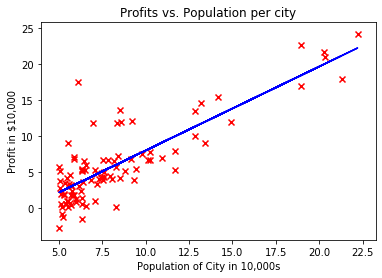

In [18]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')

In [19]:
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $4519.77
For population = 70,000, we predict a profit of $45342.45
